# Regresión Lineal - gradiente descendiente estocástico en Python

### 1. Importamos las librerias / módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Creamos el conjunto de datos

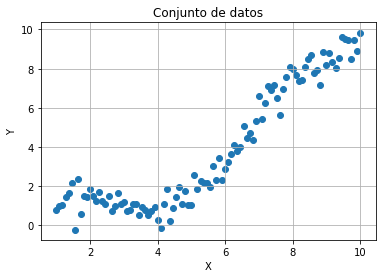

In [45]:
# data_x denomina a nuestros datos de entrada, data_y los de salida
data_x = np.linspace(1, 10, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

# Concatenamos nuestros conjunto de datos en un solo array
data_xy = np.concatenate((data_x, data_y), axis=1)
np.random.shuffle(data_xy)

data_nx = data_xy[:,0:1]
data_ny = data_xy[:,1:2]

# Agregamos nuestras etiquetas a los ejes y demás miscelaneos.
plt.scatter(data_x, data_y)

plt.xlabel('X'); plt.ylabel('Y'); plt.title('Conjunto de datos'); plt.grid('on')
plt.show()

### 3. Ejecución del algoritmo de gradiente descendiente estocástico

In [38]:
'''
====================
Gradiente de Perdida
====================
Función que realiza el cálculo del gradiente de pérdida estocastico para un conjunto de datos x, y con una matrix de peso w.
'''
def compute_sgd_loss(x, y, w):
    y_estim = np.dot(x, w)
    # SGD
    sgd_loss = 2 * np.dot(x.T, y_estim - y)
    return sgd_loss

In [48]:
# from random import randint

# Matrix de pesos y tamaño de paso
print("- Inicializando la matrix de pesos de manera aleatoria -")
weights = np.random.random((1,1))
weights_2 = np.copy(weights)
step_size = 1e-6
# Número de épocas.
n_epoch = 1000
print("Tamaño de la matrix de pesos: {}".format(weights.shape))
print("")
print("Metodo SGD")

# Tamaño de los bloques o Batch
batchSize = 10
batchNum = int(len(data_xy) / batchSize)

# Ciclo para realizar las iteracciones
for epoch in range(n_epoch) :
    
    # Función de perdida (loss function)
    loss = np.power(np.dot(data_nx, weights) - data_ny, 2).mean()
    for i in range(batchNum) :
        grad_loss = compute_sgd_loss(data_nx[(i-1)*batchNum:i*batchNum], data_ny[(i-1)*batchNum:i*batchNum], weights)
        # Update weights using gradient.
        # weights = weights - step_size * grad_loss
        weights -= step_size * grad_loss

    if epoch % 100 == 0:
        print('Epoch: %d - Loss: %.4f' % (epoch, loss))
    
print("Peso obtenido por SGD: {}".format(weights))
print("")

print("Metodo gradient descent")

for epoch in range(1000) :
    estimate = data_x.dot(weights_2)
    # Función de perdida estimada (estimate loss function)
    loss = np.power((estimate - data_y), 2).mean()

    # Calculamos el gradiente de perdida (Gradient loss)
    grad_loss = 2 * data_x.T.dot(estimate - data_y)
    weights_2 -= step_size * grad_loss
    
    if epoch % 100 == 0 :
        print("Epoch: %d - Loss: %.4f" % (epoch, loss))
        
print("Peso obtenido por gradient descent: {}".format(weights_2))

- Inicializando la matrix de pesos de manera aleatoria -
Tamaño de la matrix de pesos: (1, 1)

Metodo SGD
Epoch: 0 - Loss: 17.8106
Epoch: 100 - Loss: 6.6963
Epoch: 200 - Loss: 3.6352
Epoch: 300 - Loss: 2.7857
Epoch: 400 - Loss: 2.5466
Epoch: 500 - Loss: 2.4776
Epoch: 600 - Loss: 2.4569
Epoch: 700 - Loss: 2.4502
Epoch: 800 - Loss: 2.4479
Epoch: 900 - Loss: 2.4469
Peso obtenido por SGD: [[ 0.77220883]]

Metodo gradient descent
Epoch: 0 - Loss: 17.8106
Epoch: 100 - Loss: 5.9049
Epoch: 200 - Loss: 3.2243
Epoch: 300 - Loss: 2.6208
Epoch: 400 - Loss: 2.4849
Epoch: 500 - Loss: 2.4543
Epoch: 600 - Loss: 2.4474
Epoch: 700 - Loss: 2.4459
Epoch: 800 - Loss: 2.4455
Epoch: 900 - Loss: 2.4454
Peso obtenido por gradient descent: [[ 0.77737069]]


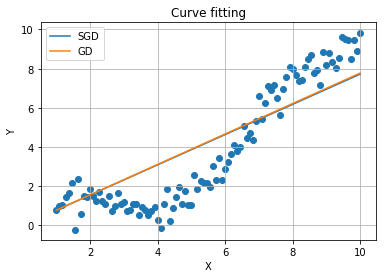

In [49]:
plt.scatter(data_x, data_y)
plt.plot(data_x, np.multiply(data_x, weights), label='SGD');
plt.plot(data_x, np.multiply(data_x, weights_2), label='GD');
plt.grid('On'); plt.title('Curve fitting'); plt.xlabel('X'); plt.ylabel('Y');
plt.legend()
plt.show()